In [1]:
import time

import gym
import gym_snake
from ml_tools import q_learning

import numpy as np
import matplotlib.pyplot as plt

from ml_tools.ui import UI

ui = UI()
ui.connect("./public")

'127.0.0.1:58761'

In [3]:


# brain_name = "baseline"
# brain_name = "pre-trained/baseline"
brain_name = "pre-trained/all-trainable"

load_pre_trained = True

In [5]:
from brain.v4.brain import Brain
from preprocessor.v1.preprocessor import Preprocessor

preprocessor = Preprocessor()
preprocessor.ui = ui
brain = Brain(learning_rate=0.0001)
brain.ui = ui

if load_pre_trained:
  pre_trained_name = "pre-trained"
  pre_trained_model_name = "@@_model_pre-trained"
  
  brain.load_layers_and_compile_model(
    name=pre_trained_name, model_name=pre_trained_model_name, 
    num_layers=6, trainable=True
  )
  print("")
else:
  brain.build_and_compile_model()

brain.model.summary()

Loaded layer:
input_2
conv2d_2
max_pooling2d_2
conv2d_3
max_pooling2d_3
flatten_1

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 50, 50, 3)]       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 32)        6176      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 2, 2, 64)          32832     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 2, 2, 64)         0         
 2D)                                                             
                                          

In [6]:
agent = q_learning.Agent(
  action_space=[0, 1, 2, 3],

  brain=brain, preprocessor=preprocessor,

  epsilon_start = 1,
  epsilon_stop = 0.001,
  epsilon_decay_num_steps = 1_000,
  
  discount_factor=0.97,
  
  replay_batch_size=32*2,
  model_batch_size=16,

  steps_to_train=20,
  steps_to_update_target=40,

  replay_memory_max_len=50_000,
  replay_memory_min_len= 2_000,
)

env = gym.make("snake-v0")

score = 0
scores = []
epsilons = []

game_num = 0

In [7]:
raw_observation = env.reset()
agent.reset(raw_observation)

while True:
  if game_num == 5_000:
    break
    
  ui.video.update_stream("raw", raw_observation)

  speed = int(ui.control.get_value("speed") or 100)
  if speed != 100:
    time.sleep(1 / speed)

  agent.training = True if (ui.control.get_value("training") or "true") == "true" else False
  action = agent.act()
  raw_next_observation, reward, done, info = env.step(action)
  agent.step(reward, raw_next_observation)
  score += reward

  raw_observation = raw_next_observation
  if done:
    scores.append(score)
    epsilons.append(agent.epsilon)
    score = 0

    game_num += 1

    raw_observation = env.reset()
    agent.reset(raw_observation)

2022-04-19 00:24:37.207191: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


4/4 [==============================] - 0s 3ms/step - loss: 0.0180


4/4 [==============================] - 0s 3ms/step - loss: 0.0093


4/4 [==============================] - 0s 2ms/step - loss: 0.0139


4/4 [==============================] - 0s 2ms/step - loss: 0.0306


4/4 [==============================] - 0s 3ms/step - loss: 0.0303


4/4 [==============================] - 0s 3ms/step - loss: 0.0142


4/4 [==============================] - 0s 2ms/step - loss: 0.0192


4/4 [==============================] - 0s 3ms/step - loss: 0.0266


4/4 [==============================] - 0s 3ms/step - loss: 0.0170


4/4 [==============================] - 0s 3ms/step - loss: 0.0130


4/4 [==============================] - 0s 2ms/step - loss: 0.0329


4/4 [==============================] - 0s 3ms/step - loss: 0.0179


4/4 [==============================] - 0s 2ms/step - loss: 0.0259


4/4 [==============================] - 0s 2ms/step - loss: 0.0259


4/4 [==============================] - 0s 3ms/step - loss: 0.0188


4/4 [==============================] - 0s 3ms/step - loss: 0.0277


4/4 [==============================] - 0s 3ms/step - loss: 0.0160


4/4 [==============================] - 0s 3ms/step - loss: 0.0171


4/4 [==============================] - 0s 2ms/step - loss: 0.0239


4/4 [==============================] - 0s 2ms/step - loss: 0.0073


4/4 [==============================] - 0s 3ms/step - loss: 0.0390


4/4 [==============================] - 0s 3ms/step - loss: 0.0597


4/4 [==============================] - 0s 3ms/step - loss: 0.0404


4/4 [==============================] - 0s 2ms/step - loss: 0.0293


4/4 [==============================] - 0s 3ms/step - loss: 0.0205


4/4 [==============================] - 0s 3ms/step - loss: 0.0233


4/4 [==============================] - 0s 3ms/step - loss: 0.0127


4/4 [==============================] - 0s 2ms/step - loss: 0.0110


4/4 [==============================] - 0s 3ms/step - loss: 0.0087


4/4 [==============================] - 0s 3ms/step - loss: 0.0185


4/4 [==============================] - 0s 3ms/step - loss: 0.0197


4/4 [==============================] - 0s 3ms/step - loss: 0.0113


4/4 [==============================] - 0s 3ms/step - loss: 0.0094


4/4 [==============================] - 0s 3ms/step - loss: 0.0071


4/4 [==============================] - 0s 2ms/step - loss: 0.0158


4/4 [==============================] - 0s 3ms/step - loss: 0.0053


4/4 [==============================] - 0s 3ms/step - loss: 0.0135


4/4 [==============================] - 0s 3ms/step - loss: 0.0521


4/4 [==============================] - 0s 2ms/step - loss: 0.0147


4/4 [==============================] - 0s 3ms/step - loss: 0.0049


4/4 [==============================] - 0s 2ms/step - loss: 0.0142


4/4 [==============================] - 0s 3ms/step - loss: 0.0115


4/4 [==============================] - 0s 2ms/step - loss: 0.0144


4/4 [==============================] - 0s 2ms/step - loss: 0.0254


4/4 [==============================] - 0s 3ms/step - loss: 0.0041


4/4 [==============================] - 0s 3ms/step - loss: 0.0075


4/4 [==============================] - 0s 3ms/step - loss: 0.0060


4/4 [==============================] - 0s 2ms/step - loss: 0.0028


4/4 [==============================] - 0s 3ms/step - loss: 0.0249


4/4 [==============================] - 0s 2ms/step - loss: 0.0077


4/4 [==============================] - 0s 3ms/step - loss: 0.0023


4/4 [==============================] - 0s 2ms/step - loss: 0.0075


4/4 [==============================] - 0s 2ms/step - loss: 0.0043


4/4 [==============================] - 0s 3ms/step - loss: 0.0044


4/4 [==============================] - 0s 3ms/step - loss: 0.0023


4/4 [==============================] - 0s 3ms/step - loss: 0.0031


4/4 [==============================] - 0s 3ms/step - loss: 0.0015


4/4 [==============================] - 0s 3ms/step - loss: 0.0024


4/4 [==============================] - 0s 3ms/step - loss: 0.0011


4/4 [==============================] - 0s 3ms/step - loss: 9.5056e-04


4/4 [==============================] - 0s 2ms/step - loss: 0.0040


4/4 [==============================] - 0s 3ms/step - loss: 0.0064


4/4 [==============================] - 0s 2ms/step - loss: 0.0018


4/4 [==============================] - 0s 2ms/step - loss: 0.0016


4/4 [==============================] - 0s 3ms/step - loss: 7.9865e-04


4/4 [==============================] - 0s 2ms/step - loss: 8.7197e-04


4/4 [==============================] - 0s 3ms/step - loss: 9.8643e-04


4/4 [==============================] - 0s 2ms/step - loss: 3.9696e-04


4/4 [==============================] - 0s 3ms/step - loss: 3.5119e-04


4/4 [==============================] - 0s 2ms/step - loss: 5.1600e-04


4/4 [==============================] - 0s 2ms/step - loss: 0.0015


4/4 [==============================] - 0s 3ms/step - loss: 6.7488e-04


4/4 [==============================] - 0s 2ms/step - loss: 3.1422e-04


4/4 [==============================] - 0s 2ms/step - loss: 4.1191e-04


4/4 [==============================] - 0s 3ms/step - loss: 5.5883e-04


4/4 [==============================] - 0s 3ms/step - loss: 4.2374e-04


4/4 [==============================] - 0s 2ms/step - loss: 2.8221e-04


4/4 [==============================] - 0s 3ms/step - loss: 3.2403e-04


4/4 [==============================] - 0s 2ms/step - loss: 2.7271e-04


4/4 [==============================] - 0s 3ms/step - loss: 2.3377e-04


4/4 [==============================] - 0s 2ms/step - loss: 3.0378e-04


4/4 [==============================] - 0s 3ms/step - loss: 5.2491e-04


4/4 [==============================] - 0s 3ms/step - loss: 6.8508e-04


4/4 [==============================] - 0s 2ms/step - loss: 2.8907e-04


4/4 [==============================] - 0s 3ms/step - loss: 3.5043e-04


4/4 [==============================] - 0s 3ms/step - loss: 2.2569e-04


4/4 [==============================] - 0s 3ms/step - loss: 2.9360e-04


4/4 [==============================] - 0s 2ms/step - loss: 1.7945e-04


4/4 [==============================] - 0s 2ms/step - loss: 4.9899e-04


4/4 [==============================] - 0s 3ms/step - loss: 1.3026e-04


4/4 [==============================] - 0s 3ms/step - loss: 1.2865e-04


4/4 [==============================] - 0s 2ms/step - loss: 1.4162e-04


4/4 [==============================] - 0s 3ms/step - loss: 2.2827e-04


4/4 [==============================] - 0s 2ms/step - loss: 3.0098e-04


4/4 [==============================] - 0s 3ms/step - loss: 0.0011


4/4 [==============================] - 0s 3ms/step - loss: 2.5828e-04


4/4 [==============================] - 0s 2ms/step - loss: 3.3801e-04


4/4 [==============================] - 0s 3ms/step - loss: 3.8991e-04


4/4 [==============================] - 0s 2ms/step - loss: 9.0437e-04


4/4 [==============================] - 0s 2ms/step - loss: 0.0378


4/4 [==============================] - 0s 3ms/step - loss: 1.3884e-04


4/4 [==============================] - 0s 2ms/step - loss: 1.3720e-04


4/4 [==============================] - 0s 3ms/step - loss: 9.3592e-05


4/4 [==============================] - 0s 2ms/step - loss: 1.0860e-04


4/4 [==============================] - 0s 3ms/step - loss: 1.4628e-04


4/4 [==============================] - 0s 3ms/step - loss: 0.0014


4/4 [==============================] - 0s 2ms/step - loss: 2.0219e-04


4/4 [==============================] - 0s 2ms/step - loss: 1.9012e-04


4/4 [==============================] - 0s 2ms/step - loss: 0.0035


4/4 [==============================] - 0s 2ms/step - loss: 2.0887e-04


4/4 [==============================] - 0s 3ms/step - loss: 1.2598e-04


4/4 [==============================] - 0s 2ms/step - loss: 6.0796e-04


4/4 [==============================] - 0s 3ms/step - loss: 2.3080e-04


4/4 [==============================] - 0s 2ms/step - loss: 1.4372e-04


4/4 [==============================] - 0s 3ms/step - loss: 1.1200e-04


4/4 [==============================] - 0s 2ms/step - loss: 6.8577e-05


4/4 [==============================] - 0s 2ms/step - loss: 1.0092e-04


4/4 [==============================] - 0s 3ms/step - loss: 1.8111e-04


4/4 [==============================] - 0s 2ms/step - loss: 7.5502e-05


4/4 [==============================] - 0s 2ms/step - loss: 5.4657e-05


4/4 [==============================] - 0s 3ms/step - loss: 1.5144e-04


4/4 [==============================] - 0s 2ms/step - loss: 0.0037


4/4 [==============================] - 0s 2ms/step - loss: 2.8979e-04


4/4 [==============================] - 0s 3ms/step - loss: 8.8799e-05


4/4 [==============================] - 0s 3ms/step - loss: 8.4133e-05


4/4 [==============================] - 0s 3ms/step - loss: 6.0054e-05


4/4 [==============================] - 0s 3ms/step - loss: 1.0375e-04


4/4 [==============================] - 0s 3ms/step - loss: 2.5088e-04


4/4 [==============================] - 0s 2ms/step - loss: 2.5925e-04


4/4 [==============================] - 0s 2ms/step - loss: 1.4009e-04


4/4 [==============================] - 0s 3ms/step - loss: 0.0067


4/4 [==============================] - 0s 3ms/step - loss: 1.8552e-04


4/4 [==============================] - 0s 3ms/step - loss: 1.8925e-04


4/4 [==============================] - 0s 2ms/step - loss: 9.3426e-05


4/4 [==============================] - 0s 2ms/step - loss: 1.8943e-04


4/4 [==============================] - 0s 2ms/step - loss: 2.6487e-04


4/4 [==============================] - 0s 3ms/step - loss: 1.2749e-04


4/4 [==============================] - 0s 3ms/step - loss: 6.7330e-05


4/4 [==============================] - 0s 2ms/step - loss: 1.6223e-04


4/4 [==============================] - 0s 2ms/step - loss: 1.7024e-04


4/4 [==============================] - 0s 3ms/step - loss: 2.0521e-04


4/4 [==============================] - 0s 2ms/step - loss: 2.6891e-04


4/4 [==============================] - 0s 3ms/step - loss: 9.5671e-05


4/4 [==============================] - 0s 2ms/step - loss: 1.2832e-04


4/4 [==============================] - 0s 3ms/step - loss: 8.6964e-05


4/4 [==============================] - 0s 3ms/step - loss: 2.0783e-04


4/4 [==============================] - 0s 3ms/step - loss: 1.4432e-04


4/4 [==============================] - 0s 3ms/step - loss: 0.0027


4/4 [==============================] - 0s 3ms/step - loss: 6.0307e-05


4/4 [==============================] - 0s 3ms/step - loss: 2.6785e-04


4/4 [==============================] - 0s 3ms/step - loss: 1.4730e-04


4/4 [==============================] - 0s 3ms/step - loss: 7.1676e-05


4/4 [==============================] - 0s 3ms/step - loss: 5.5722e-05


4/4 [==============================] - 0s 3ms/step - loss: 0.0035


4/4 [==============================] - 0s 3ms/step - loss: 3.1267e-04


4/4 [==============================] - 0s 2ms/step - loss: 6.1246e-05


4/4 [==============================] - 0s 3ms/step - loss: 7.0469e-05


4/4 [==============================] - 0s 2ms/step - loss: 3.9957e-05


4/4 [==============================] - 0s 2ms/step - loss: 6.5757e-05


4/4 [==============================] - 0s 2ms/step - loss: 1.4791e-04


4/4 [==============================] - 0s 3ms/step - loss: 1.8781e-04


4/4 [==============================] - 0s 2ms/step - loss: 2.1900e-04


4/4 [==============================] - 0s 3ms/step - loss: 1.2951e-04


4/4 [==============================] - 0s 2ms/step - loss: 3.2763e-04


4/4 [==============================] - 0s 3ms/step - loss: 1.9726e-04


4/4 [==============================] - 0s 2ms/step - loss: 2.1855e-04


4/4 [==============================] - 0s 3ms/step - loss: 8.6777e-05


4/4 [==============================] - 0s 3ms/step - loss: 8.6083e-05


4/4 [==============================] - 0s 2ms/step - loss: 1.4137e-04


4/4 [==============================] - 0s 3ms/step - loss: 1.6696e-04


4/4 [==============================] - 0s 2ms/step - loss: 1.2037e-04


4/4 [==============================] - 0s 2ms/step - loss: 0.0012


4/4 [==============================] - 0s 3ms/step - loss: 2.1335e-04


4/4 [==============================] - 0s 2ms/step - loss: 1.1973e-04


4/4 [==============================] - 0s 2ms/step - loss: 9.3648e-05


4/4 [==============================] - 0s 3ms/step - loss: 1.7213e-04


4/4 [==============================] - 0s 2ms/step - loss: 5.8418e-04


4/4 [==============================] - 0s 2ms/step - loss: 3.8391e-04


4/4 [==============================] - 0s 3ms/step - loss: 5.1043e-04


4/4 [==============================] - 0s 2ms/step - loss: 3.9500e-04


4/4 [==============================] - 0s 3ms/step - loss: 2.5863e-04


4/4 [==============================] - 0s 3ms/step - loss: 4.4332e-04


4/4 [==============================] - 0s 2ms/step - loss: 1.9148e-04


4/4 [==============================] - 0s 2ms/step - loss: 3.0316e-04


4/4 [==============================] - 0s 2ms/step - loss: 1.0882e-04


4/4 [==============================] - 0s 2ms/step - loss: 3.9782e-04


4/4 [==============================] - 0s 3ms/step - loss: 1.4246e-04


4/4 [==============================] - 0s 2ms/step - loss: 2.1809e-04


4/4 [==============================] - 0s 2ms/step - loss: 1.8186e-04


4/4 [==============================] - 0s 2ms/step - loss: 1.5336e-04


4/4 [==============================] - 0s 2ms/step - loss: 4.7521e-04


4/4 [==============================] - 0s 2ms/step - loss: 2.6699e-04


4/4 [==============================] - 0s 2ms/step - loss: 3.8720e-04


4/4 [==============================] - 0s 3ms/step - loss: 2.9134e-04


4/4 [==============================] - 0s 3ms/step - loss: 2.7166e-04


4/4 [==============================] - 0s 3ms/step - loss: 2.1853e-04


4/4 [==============================] - 0s 2ms/step - loss: 0.0044


4/4 [==============================] - 0s 2ms/step - loss: 4.7999e-04


4/4 [==============================] - 0s 3ms/step - loss: 0.0020


4/4 [==============================] - 0s 3ms/step - loss: 4.5458e-04


4/4 [==============================] - 0s 2ms/step - loss: 0.0018


4/4 [==============================] - 0s 2ms/step - loss: 0.0047


4/4 [==============================] - 0s 2ms/step - loss: 0.0019


4/4 [==============================] - 0s 3ms/step - loss: 0.0040


4/4 [==============================] - 0s 2ms/step - loss: 5.8804e-04


4/4 [==============================] - 0s 3ms/step - loss: 3.7371e-04


4/4 [==============================] - 0s 2ms/step - loss: 5.3645e-04


4/4 [==============================] - 0s 2ms/step - loss: 0.0026


4/4 [==============================] - 0s 2ms/step - loss: 7.6067e-04


4/4 [==============================] - 0s 2ms/step - loss: 0.0014


4/4 [==============================] - 0s 2ms/step - loss: 0.0013


4/4 [==============================] - 0s 3ms/step - loss: 8.4754e-04


4/4 [==============================] - 0s 2ms/step - loss: 0.0023


4/4 [==============================] - 0s 2ms/step - loss: 0.0012


4/4 [==============================] - 0s 2ms/step - loss: 0.0018


4/4 [==============================] - 0s 3ms/step - loss: 0.0019


4/4 [==============================] - 0s 3ms/step - loss: 0.0028


4/4 [==============================] - 0s 2ms/step - loss: 0.0012


4/4 [==============================] - 0s 3ms/step - loss: 0.0033


4/4 [==============================] - 0s 2ms/step - loss: 9.4500e-04


4/4 [==============================] - 0s 3ms/step - loss: 0.0013


4/4 [==============================] - 0s 2ms/step - loss: 0.0015


4/4 [==============================] - 0s 3ms/step - loss: 8.1054e-04


4/4 [==============================] - 0s 2ms/step - loss: 0.0050


4/4 [==============================] - 0s 3ms/step - loss: 9.0134e-04


4/4 [==============================] - 0s 2ms/step - loss: 0.0037


4/4 [==============================] - 0s 3ms/step - loss: 0.0015


4/4 [==============================] - 0s 3ms/step - loss: 0.0032


4/4 [==============================] - 0s 2ms/step - loss: 0.0029


4/4 [==============================] - 0s 3ms/step - loss: 0.0021


4/4 [==============================] - 0s 2ms/step - loss: 0.0022


4/4 [==============================] - 0s 2ms/step - loss: 0.0025


4/4 [==============================] - 0s 3ms/step - loss: 0.0013


4/4 [==============================] - 0s 2ms/step - loss: 0.0015


4/4 [==============================] - 0s 3ms/step - loss: 0.0020


4/4 [==============================] - 0s 2ms/step - loss: 0.0022


4/4 [==============================] - 0s 2ms/step - loss: 0.0062


4/4 [==============================] - 0s 3ms/step - loss: 0.0028


4/4 [==============================] - 0s 2ms/step - loss: 0.0031


4/4 [==============================] - 0s 2ms/step - loss: 0.0036


4/4 [==============================] - 0s 2ms/step - loss: 0.0030


4/4 [==============================] - 0s 3ms/step - loss: 0.0054


4/4 [==============================] - 0s 2ms/step - loss: 0.0030


4/4 [==============================] - 0s 3ms/step - loss: 0.0030


4/4 [==============================] - 0s 2ms/step - loss: 0.0034


4/4 [==============================] - 0s 3ms/step - loss: 0.0024


4/4 [==============================] - 0s 2ms/step - loss: 0.0118


4/4 [==============================] - 0s 3ms/step - loss: 0.0092


4/4 [==============================] - 0s 3ms/step - loss: 0.0068


4/4 [==============================] - 0s 3ms/step - loss: 0.0063


4/4 [==============================] - 0s 3ms/step - loss: 0.0054


4/4 [==============================] - 0s 3ms/step - loss: 0.0062


4/4 [==============================] - 0s 2ms/step - loss: 0.0066


4/4 [==============================] - 0s 2ms/step - loss: 0.0061


4/4 [==============================] - 0s 3ms/step - loss: 0.0064


4/4 [==============================] - 0s 3ms/step - loss: 0.0084


4/4 [==============================] - 0s 3ms/step - loss: 0.0077


4/4 [==============================] - 0s 3ms/step - loss: 0.0058


4/4 [==============================] - 0s 3ms/step - loss: 0.0061


4/4 [==============================] - 0s 2ms/step - loss: 0.0067


4/4 [==============================] - 0s 2ms/step - loss: 0.0118


4/4 [==============================] - 0s 3ms/step - loss: 0.0133


4/4 [==============================] - 0s 3ms/step - loss: 0.0055


4/4 [==============================] - 0s 3ms/step - loss: 0.0041


4/4 [==============================] - 0s 3ms/step - loss: 0.0040


4/4 [==============================] - 0s 2ms/step - loss: 0.0042


4/4 [==============================] - 0s 3ms/step - loss: 0.0058


4/4 [==============================] - 0s 2ms/step - loss: 0.0075


4/4 [==============================] - 0s 2ms/step - loss: 0.0061


4/4 [==============================] - 0s 3ms/step - loss: 0.0083


4/4 [==============================] - 0s 3ms/step - loss: 0.0075


4/4 [==============================] - 0s 3ms/step - loss: 0.0039


4/4 [==============================] - 0s 3ms/step - loss: 0.0133


4/4 [==============================] - 0s 2ms/step - loss: 0.0056


4/4 [==============================] - 0s 2ms/step - loss: 0.0139


4/4 [==============================] - 0s 2ms/step - loss: 0.0079


4/4 [==============================] - 0s 2ms/step - loss: 0.0049


4/4 [==============================] - 0s 3ms/step - loss: 0.0060


4/4 [==============================] - 0s 3ms/step - loss: 0.0086


4/4 [==============================] - 0s 3ms/step - loss: 0.0052


4/4 [==============================] - 0s 3ms/step - loss: 0.0070


4/4 [==============================] - 0s 2ms/step - loss: 0.0089


4/4 [==============================] - 0s 3ms/step - loss: 0.0076


4/4 [==============================] - 0s 3ms/step - loss: 0.0126


4/4 [==============================] - 0s 3ms/step - loss: 0.0095


4/4 [==============================] - 0s 2ms/step - loss: 0.0092


4/4 [==============================] - 0s 3ms/step - loss: 0.0042


4/4 [==============================] - 0s 3ms/step - loss: 0.0049


4/4 [==============================] - 0s 2ms/step - loss: 0.0101


4/4 [==============================] - 0s 3ms/step - loss: 0.0073


4/4 [==============================] - 0s 3ms/step - loss: 0.0049


4/4 [==============================] - 0s 2ms/step - loss: 0.0086


4/4 [==============================] - 0s 3ms/step - loss: 0.0056


4/4 [==============================] - 0s 3ms/step - loss: 0.0160


4/4 [==============================] - 0s 2ms/step - loss: 0.0052


4/4 [==============================] - 0s 3ms/step - loss: 0.0051


4/4 [==============================] - 0s 3ms/step - loss: 0.0127


4/4 [==============================] - 0s 3ms/step - loss: 0.0050


4/4 [==============================] - 0s 3ms/step - loss: 0.0042


4/4 [==============================] - 0s 3ms/step - loss: 0.0065


4/4 [==============================] - 0s 2ms/step - loss: 0.0103


4/4 [==============================] - 0s 2ms/step - loss: 0.0123


4/4 [==============================] - 0s 2ms/step - loss: 0.0101


4/4 [==============================] - 0s 2ms/step - loss: 0.0053


4/4 [==============================] - 0s 3ms/step - loss: 0.0067


4/4 [==============================] - 0s 3ms/step - loss: 0.0056


4/4 [==============================] - 0s 3ms/step - loss: 0.0062


4/4 [==============================] - 0s 2ms/step - loss: 0.0082


4/4 [==============================] - 0s 2ms/step - loss: 0.0051


4/4 [==============================] - 0s 2ms/step - loss: 0.0056


4/4 [==============================] - 0s 3ms/step - loss: 0.0042


4/4 [==============================] - 0s 3ms/step - loss: 0.0123


4/4 [==============================] - 0s 3ms/step - loss: 0.0086


4/4 [==============================] - 0s 3ms/step - loss: 0.0073


4/4 [==============================] - 0s 2ms/step - loss: 0.0063


4/4 [==============================] - 0s 2ms/step - loss: 0.0067


4/4 [==============================] - 0s 3ms/step - loss: 0.0063


4/4 [==============================] - 0s 3ms/step - loss: 0.0043


4/4 [==============================] - 0s 2ms/step - loss: 0.0059


4/4 [==============================] - 0s 2ms/step - loss: 0.0092


4/4 [==============================] - 0s 2ms/step - loss: 0.0082


4/4 [==============================] - 0s 2ms/step - loss: 0.0032


4/4 [==============================] - 0s 2ms/step - loss: 0.0128


4/4 [==============================] - 0s 3ms/step - loss: 0.0048


4/4 [==============================] - 0s 3ms/step - loss: 0.0079


4/4 [==============================] - 0s 2ms/step - loss: 0.0055


4/4 [==============================] - 0s 2ms/step - loss: 0.0110


4/4 [==============================] - 0s 2ms/step - loss: 0.0070


4/4 [==============================] - 0s 3ms/step - loss: 0.0085


4/4 [==============================] - 0s 3ms/step - loss: 0.0084


4/4 [==============================] - 0s 3ms/step - loss: 0.0063


4/4 [==============================] - 0s 2ms/step - loss: 0.0063


4/4 [==============================] - 0s 3ms/step - loss: 0.0147


4/4 [==============================] - 0s 2ms/step - loss: 0.0069


4/4 [==============================] - 0s 3ms/step - loss: 0.0074


4/4 [==============================] - 0s 2ms/step - loss: 0.0040


4/4 [==============================] - 0s 3ms/step - loss: 0.0080


4/4 [==============================] - 0s 2ms/step - loss: 0.0069


4/4 [==============================] - 0s 3ms/step - loss: 0.0028


4/4 [==============================] - 0s 3ms/step - loss: 0.0035


4/4 [==============================] - 0s 2ms/step - loss: 0.0033


4/4 [==============================] - 0s 3ms/step - loss: 0.0051


4/4 [==============================] - 0s 3ms/step - loss: 0.0047


4/4 [==============================] - 0s 2ms/step - loss: 0.0066


4/4 [==============================] - 0s 2ms/step - loss: 0.0067


4/4 [==============================] - 0s 2ms/step - loss: 0.0072


4/4 [==============================] - 0s 3ms/step - loss: 0.0057


4/4 [==============================] - 0s 3ms/step - loss: 0.0035


4/4 [==============================] - 0s 3ms/step - loss: 0.0027


4/4 [==============================] - 0s 2ms/step - loss: 0.0030


4/4 [==============================] - 0s 2ms/step - loss: 0.0050


4/4 [==============================] - 0s 2ms/step - loss: 0.0050


4/4 [==============================] - 0s 2ms/step - loss: 0.0047


4/4 [==============================] - 0s 2ms/step - loss: 0.0090


4/4 [==============================] - 0s 2ms/step - loss: 0.0118


4/4 [==============================] - 0s 2ms/step - loss: 0.0038


4/4 [==============================] - 0s 2ms/step - loss: 0.0050


4/4 [==============================] - 0s 2ms/step - loss: 0.0022


4/4 [==============================] - 0s 2ms/step - loss: 0.0052


4/4 [==============================] - 0s 2ms/step - loss: 0.0029


4/4 [==============================] - 0s 2ms/step - loss: 0.0049


4/4 [==============================] - 0s 2ms/step - loss: 0.0074


4/4 [==============================] - 0s 2ms/step - loss: 0.0060


4/4 [==============================] - 0s 2ms/step - loss: 0.0074


4/4 [==============================] - 0s 2ms/step - loss: 0.0036


4/4 [==============================] - 0s 2ms/step - loss: 0.0030


4/4 [==============================] - 0s 2ms/step - loss: 0.0046


4/4 [==============================] - 0s 2ms/step - loss: 0.0082


4/4 [==============================] - 0s 2ms/step - loss: 0.0032


4/4 [==============================] - 0s 2ms/step - loss: 0.0051


4/4 [==============================] - 0s 2ms/step - loss: 0.0062


4/4 [==============================] - 0s 2ms/step - loss: 0.0061


4/4 [==============================] - 0s 2ms/step - loss: 0.0170


4/4 [==============================] - 0s 2ms/step - loss: 0.0107


4/4 [==============================] - 0s 2ms/step - loss: 0.0035


4/4 [==============================] - 0s 2ms/step - loss: 0.0063


4/4 [==============================] - 0s 2ms/step - loss: 0.0082


4/4 [==============================] - 0s 2ms/step - loss: 0.0054


4/4 [==============================] - 0s 2ms/step - loss: 0.0063


4/4 [==============================] - 0s 2ms/step - loss: 0.0039


4/4 [==============================] - 0s 2ms/step - loss: 0.0050


4/4 [==============================] - 0s 2ms/step - loss: 0.0048


4/4 [==============================] - 0s 2ms/step - loss: 0.0064


4/4 [==============================] - 0s 2ms/step - loss: 0.0056


4/4 [==============================] - 0s 2ms/step - loss: 0.0027


4/4 [==============================] - 0s 2ms/step - loss: 0.0064


4/4 [==============================] - 0s 2ms/step - loss: 0.0037


4/4 [==============================] - 0s 2ms/step - loss: 0.0086


4/4 [==============================] - 0s 2ms/step - loss: 0.0033


4/4 [==============================] - 0s 2ms/step - loss: 0.0058


4/4 [==============================] - 0s 2ms/step - loss: 0.0026


4/4 [==============================] - 0s 2ms/step - loss: 0.0038


4/4 [==============================] - 0s 2ms/step - loss: 0.0024


4/4 [==============================] - 0s 2ms/step - loss: 0.0063


4/4 [==============================] - 0s 2ms/step - loss: 0.0034


4/4 [==============================] - 0s 2ms/step - loss: 0.0035


4/4 [==============================] - 0s 2ms/step - loss: 0.0042


4/4 [==============================] - 0s 2ms/step - loss: 0.0056


4/4 [==============================] - 0s 2ms/step - loss: 0.0032


4/4 [==============================] - 0s 2ms/step - loss: 0.0065


4/4 [==============================] - 0s 2ms/step - loss: 0.0027


4/4 [==============================] - 0s 2ms/step - loss: 0.0087


4/4 [==============================] - 0s 2ms/step - loss: 0.0048


4/4 [==============================] - 0s 2ms/step - loss: 0.0052


4/4 [==============================] - 0s 2ms/step - loss: 0.0089


4/4 [==============================] - 0s 2ms/step - loss: 0.0109


4/4 [==============================] - 0s 2ms/step - loss: 0.0051


4/4 [==============================] - 0s 2ms/step - loss: 0.0043


4/4 [==============================] - 0s 2ms/step - loss: 0.0048


4/4 [==============================] - 0s 2ms/step - loss: 0.0061


4/4 [==============================] - 0s 2ms/step - loss: 0.0040


4/4 [==============================] - 0s 2ms/step - loss: 0.0064


4/4 [==============================] - 0s 2ms/step - loss: 0.0043


4/4 [==============================] - 0s 2ms/step - loss: 0.0075


4/4 [==============================] - 0s 3ms/step - loss: 0.0029


4/4 [==============================] - 0s 3ms/step - loss: 0.0078


4/4 [==============================] - 0s 2ms/step - loss: 0.0032


4/4 [==============================] - 0s 2ms/step - loss: 0.0040


4/4 [==============================] - 0s 2ms/step - loss: 0.0043


4/4 [==============================] - 0s 2ms/step - loss: 0.0056


4/4 [==============================] - 0s 2ms/step - loss: 0.0043


4/4 [==============================] - 0s 2ms/step - loss: 0.0074


4/4 [==============================] - 0s 2ms/step - loss: 0.0054


4/4 [==============================] - 0s 2ms/step - loss: 0.0025


4/4 [==============================] - 0s 2ms/step - loss: 0.0047


4/4 [==============================] - 0s 2ms/step - loss: 0.0043


4/4 [==============================] - 0s 2ms/step - loss: 0.0044


4/4 [==============================] - 0s 2ms/step - loss: 0.0076


4/4 [==============================] - 0s 3ms/step - loss: 0.0043


4/4 [==============================] - 0s 2ms/step - loss: 0.0063


4/4 [==============================] - 0s 2ms/step - loss: 0.0048


4/4 [==============================] - 0s 2ms/step - loss: 0.0088


4/4 [==============================] - 0s 2ms/step - loss: 0.0038


4/4 [==============================] - 0s 2ms/step - loss: 0.0035


4/4 [==============================] - 0s 2ms/step - loss: 0.0018


4/4 [==============================] - 0s 2ms/step - loss: 0.0053


4/4 [==============================] - 0s 2ms/step - loss: 0.0064


4/4 [==============================] - 0s 2ms/step - loss: 0.0040


4/4 [==============================] - 0s 2ms/step - loss: 0.0037


4/4 [==============================] - 0s 2ms/step - loss: 0.0041


4/4 [==============================] - 0s 2ms/step - loss: 0.0071


4/4 [==============================] - 0s 2ms/step - loss: 0.0041


4/4 [==============================] - 0s 2ms/step - loss: 0.0047


4/4 [==============================] - 0s 2ms/step - loss: 0.0032


4/4 [==============================] - 0s 2ms/step - loss: 0.0086


4/4 [==============================] - 0s 2ms/step - loss: 0.0047


4/4 [==============================] - 0s 2ms/step - loss: 0.0022


4/4 [==============================] - 0s 2ms/step - loss: 0.0071


4/4 [==============================] - 0s 2ms/step - loss: 0.0064


4/4 [==============================] - 0s 2ms/step - loss: 0.0086


4/4 [==============================] - 0s 2ms/step - loss: 0.0033


4/4 [==============================] - 0s 2ms/step - loss: 0.0037


4/4 [==============================] - 0s 2ms/step - loss: 0.0070


4/4 [==============================] - 0s 2ms/step - loss: 0.0048


4/4 [==============================] - 0s 2ms/step - loss: 0.0073


4/4 [==============================] - 0s 2ms/step - loss: 0.0041


4/4 [==============================] - 0s 2ms/step - loss: 0.0073


4/4 [==============================] - 0s 2ms/step - loss: 0.0026


4/4 [==============================] - 0s 2ms/step - loss: 0.0067


4/4 [==============================] - 0s 2ms/step - loss: 0.0043


4/4 [==============================] - 0s 2ms/step - loss: 0.0064


4/4 [==============================] - 0s 2ms/step - loss: 0.0020


4/4 [==============================] - 0s 2ms/step - loss: 0.0048


4/4 [==============================] - 0s 2ms/step - loss: 0.0033


4/4 [==============================] - 0s 2ms/step - loss: 0.0065


4/4 [==============================] - 0s 2ms/step - loss: 0.0111


4/4 [==============================] - 0s 2ms/step - loss: 0.0073


4/4 [==============================] - 0s 2ms/step - loss: 0.0114


4/4 [==============================] - 0s 2ms/step - loss: 0.0064


4/4 [==============================] - 0s 2ms/step - loss: 0.0034


4/4 [==============================] - 0s 2ms/step - loss: 0.0031


4/4 [==============================] - 0s 3ms/step - loss: 0.0033


4/4 [==============================] - 0s 3ms/step - loss: 0.0034


4/4 [==============================] - 0s 2ms/step - loss: 0.0047


4/4 [==============================] - 0s 2ms/step - loss: 0.0082


4/4 [==============================] - 0s 3ms/step - loss: 0.0026


4/4 [==============================] - 0s 3ms/step - loss: 0.0092


4/4 [==============================] - 0s 3ms/step - loss: 0.0052


4/4 [==============================] - 0s 2ms/step - loss: 0.0030


4/4 [==============================] - 0s 2ms/step - loss: 0.0030


4/4 [==============================] - 0s 2ms/step - loss: 0.0033


4/4 [==============================] - 0s 2ms/step - loss: 0.0071


4/4 [==============================] - 0s 2ms/step - loss: 0.0052


4/4 [==============================] - 0s 2ms/step - loss: 0.0084


4/4 [==============================] - 0s 2ms/step - loss: 0.0042


4/4 [==============================] - 0s 2ms/step - loss: 0.0049


4/4 [==============================] - 0s 2ms/step - loss: 0.0036


4/4 [==============================] - 0s 2ms/step - loss: 0.0015


4/4 [==============================] - 0s 2ms/step - loss: 0.0061


4/4 [==============================] - 0s 2ms/step - loss: 0.0066


4/4 [==============================] - 0s 2ms/step - loss: 0.0046


4/4 [==============================] - 0s 2ms/step - loss: 0.0085


4/4 [==============================] - 0s 3ms/step - loss: 0.0043


4/4 [==============================] - 0s 3ms/step - loss: 0.0055


4/4 [==============================] - 0s 3ms/step - loss: 0.0090


4/4 [==============================] - 0s 3ms/step - loss: 0.0031


4/4 [==============================] - 0s 2ms/step - loss: 0.0073


4/4 [==============================] - 0s 3ms/step - loss: 0.0017


4/4 [==============================] - 0s 3ms/step - loss: 0.0077


4/4 [==============================] - 0s 2ms/step - loss: 0.0046


4/4 [==============================] - 0s 3ms/step - loss: 0.0057


4/4 [==============================] - 0s 2ms/step - loss: 0.0032


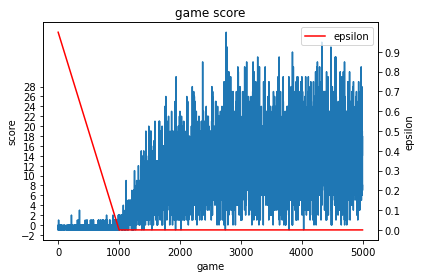

In [10]:
_, ax1 = plt.subplots()

plt.title("game score")
ax1.plot(scores)
ax1.set_xlabel("game")
ax1.set_ylabel("score")
ax1.set_yticks(np.arange(-2, 30, 2))

ax2 = ax1.twinx()
ax2.plot(epsilons, "r")
ax2.set_ylabel("epsilon")
ax2.set_yticks(np.arange(0, 1, 0.1))
ax2.legend(["epsilon"], loc="upper right")

plt.savefig(f"{brain.current_folder}/{brain_name}/game_score.jpg")
plt.show()

In [13]:
brain.save_model(name=brain_name)
agent.save_params(name=f"{brain.current_folder}/{brain_name}")

INFO:tensorflow:Assets written to: /Users/wiktorjurkiewicz/repos/00_PROJECTS/@_@_GENERAL/04_CODE/ML/snake-deep-q-learning/brain/v4/pre-trained/all-trainable/@@_model/assets
